# Kirkland Fig. 7.17a

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np

from ase.build import mx2
from ase.io import read
from ase.visualize import view

from tensorwaves.waves import ProbeWaves
from tensorwaves.potentials import Potential
from tensorwaves.plotutils import plot_atoms
from tensorwaves.analyse import fwhm

from ase.build import diamond111
from ase.visualize import view
import matplotlib.pyplot as plt

In [2]:
atoms = diamond111('Si', (1,2,125))
cell = atoms.cell
cell[1,0] = 0
atoms.set_cell(cell)
atoms.wrap()
atoms *= (12,6,1)
atoms.center(axis=2, vacuum=2)

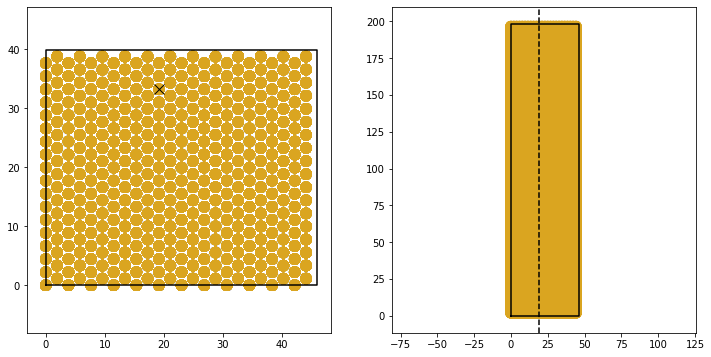

In [3]:
probe_position = atoms.get_positions()[len(atoms)//2-50, :2]  # place on atom with id 10

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
plot_atoms(atoms, plane='xy', ax=ax1)
ax1.plot(probe_position[0], probe_position[1], 'kx', markersize=10)
plot_atoms(atoms, plane='xz', ax=ax2)
ax2.axvline(probe_position[0], color='k', linestyle='--')

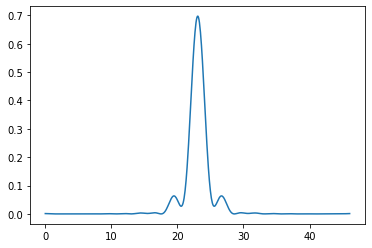

In [4]:
energy = 100e3
aperture = .008
Cs = 3.3e7
sampling = .075

probe = ProbeWaves(energy=energy, 
                   extent=np.diag(atoms.cell)[:2], 
                   sampling=sampling,
                   aperture_cutoff=aperture, 
                   Cs=Cs,)

defocus = -1.2 * np.sqrt(Cs*probe.wavelength)
probe.aberrations.defocus = defocus
probe.positions = probe_position

probe.show_profile()

In [5]:
exit_probe = probe.multislice(atoms)

pattern = exit_probe.diffractogram().numpy()[0]

Multislice [||||||||||||||||||||||||||||||||||||||||||||||||||] 397/397 


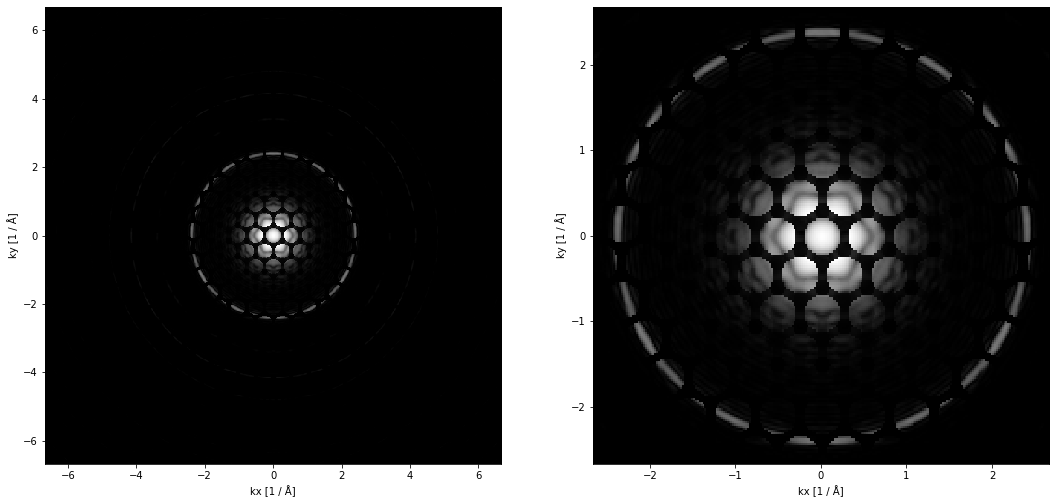

In [7]:
log_scale = .001
zoom = 2.5

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,12))
ax1.imshow(np.log(1 + log_scale * pattern).T, extent=probe.grid.fftfreq_range(), cmap='gray')
ax1.set_xlabel('kx [1 / Å]')
ax1.set_ylabel('ky [1 / Å]')

crop = ((1 - 1 / zoom) * np.array(pattern.shape) / 2).astype(int)
ax2.imshow(np.log(1 + log_scale * pattern)[crop[0] : -crop[0] - 1, crop[1] : -crop[1] -1].T, 
           extent=probe.grid.fftfreq_range()/zoom, cmap='gray')

ax2.set_xlabel('kx [1 / Å]')
ax2.set_ylabel('ky [1 / Å]');